In [1]:
import pandas as pd
import numpy as np
import sys
import os
import genomepy

/root/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_dir = os.path.abspath('')
save_path = os.path.join(file_dir, 'generated_data')

In [16]:
df = pd.read_csv(save_path + "/sampled_df_columns_renamed_bidir.csv", index_col=0).sample(100000)
df

,locus_id,cre_sequence,cre_chrom,cre_start,cre_end,summit_center,tf_cluster,cell_type_leiden,tf_state,cre_pos,cre_neg
5186372,chr3_51670851_51671352_+,TGCTGCGCCTCCCTAGGCTGTACAAATTCTCCTCAGCCCCAGCTCC...,chr3,51670851,51671352,51671252,251,1,[-2.297238 5.884343 -1.8765036 -1.142733...,0.0,0.0
3692650,chr19_20424830_20425331_-,CCAATACCTGCAGGTCAAAGGGCCTCAGAGGCTGGGCCTCTATGAG...,chr19,20424830,20425331,20424931,290,3,[-4.0217505 -3.8701944 1.4739938 5.029199...,0.0,0.0
5573186,chr4_80073128_80073872_-,GTCCCCTTTAGGGGAGGAGGCTAGCTGGCCCTGGGACTCCCGGCTG...,chr4,80073128,80073872,80073315,151,1,[-3.3846982 3.8862689 -1.5372126 0.663892...,0.0,0.0
5505363,chr4_36281215_36281716_+,CCAGCTTCAACATTTATTAATTCTTACAGCAAATTTTATACCTCTA...,chr4,36281215,36281716,36281616,315,0,[12.276233 0.29082283 -0.9882644 1.477323...,0.0,0.0
630855,chr1_196651642_196652143_+,TGCTGATTGTGAAAACATTGCCTAAACCAAAGTTTTGTATGTGATT...,chr1,196651642,196652143,196652043,143,2,[-4.90673304e+00 -3.36905456e+00 -3.55394632e-...,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6392316,chr6_137867822_137868323_+,GCGCCCCTCGGGCCCTCCGATCGGGTGGTCGTTGGCGCTTTGCTCC...,chr6,137867822,137868323,137868199,382,1,[-3.3937242 7.8052564 0.66309255 2.260239...,0.0,0.0
5939984,chr5_140557355_140557856_-,CTAAGCGCCGCAACCGCCCCCAGCCTAGGCCGGGGCGACAACCTAG...,chr5,140557355,140557856,140557456,188,1,[-1.7763593 4.5884495 1.4469132 -1.327181...,0.0,0.0
2797743,chr16_75648537_75649038_-,CCGCGGATAGCGGGGGTGAGGAGGCTGAGCGCGGGGCCTCGCGGAT...,chr16,75648537,75649038,75648671,240,4,[-3.6646812 1.822955 -1.0430255 -1.811887...,0.0,0.0
67704,chr1_11272825_11273596_+,GCTAAGAGAGGCTGATTGCAGTTAGTCTGGAAGTAGCTGCGGGGCG...,chr1,11272825,11273596,11273329,25,8,[ 9.09722519e+00 1.02032554e+00 1.40543365e+...,0.0,0.0


In [17]:
import random

In [18]:

shuffled_data = df[df['cre_chrom']=='chr2'].reset_index(drop=True)
shuffled_data["cre_sequence"] = shuffled_data["cre_sequence"].apply(
        lambda x: "".join(random.sample(x, len(x)))
    )

In [20]:
test_data = df[df['cre_chrom'] == "chr1"].reset_index(drop=True)


train_data = df[(df["cre_chrom"]!= "chr1") & (df["cre_chrom"] != "chr2")].reset_index(drop=True)

In [9]:
print(f"Intersection between test and shuffled: {len(set(test_data['locus_id']).intersection(set(shuffled_data['locus_id'])))}")
print(f"Intersection between test and train: {len(set(test_data['locus_id']).intersection(set(train_data['locus_id'])))}")
print(f"Intersection between shuffled and train: {len(set(shuffled_data['locus_id']).intersection(set(train_data['locus_id'])))}")

Intersection between test and shuffled: 0
Intersection between test and train: 0
Intersection between shuffled and train: 0


In [4]:
unique_seqs = df['cre_sequence'].unique()
len(unique_seqs)

16284

In [5]:
np.where(np.char.find(unique_seqs.astype(str), 'N') > -1)[0]

array([ 1826, 15752, 15753])

In [6]:
df[df['cre_sequence'].str.contains('N')]['locus_id'].unique()

array(['chr10_58267793_58268294_-', 'chrM_2776_3434_+',
       'chrM_3063_3604_-'], dtype=object)

In [7]:
df['locus_id'].nunique()

16298

In [8]:
df.drop_duplicates('locus_id').shape

(16298, 11)

In [10]:
import re


def string_to_array(s):
    # Remove newline characters and replace multiple spaces with a single space
    clean_str = re.sub(r'\s+', ' ', s.replace('\n', ' '))
    # Remove the brackets
    clean_str = clean_str.strip('[]')
    # Split the string into a list of floats
    array_list = [float(item) for item in clean_str.split()]
    # Convert the list to a NumPy array
    return np.array(array_list)

In [11]:
df['tf_state'] = df['tf_state'].apply(string_to_array)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7643762 entries, 0 to 7643761
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   locus_id          object 
 1   cre_sequence      object 
 2   cre_chrom         object 
 3   cre_start         int64  
 4   cre_end           int64  
 5   summit_center     int64  
 6   tf_cluster        int64  
 7   cell_type_leiden  int64  
 8   tf_state          object 
 9   cre_pos           float64
 10  cre_neg           float64
dtypes: float64(2), int64(5), object(4)
memory usage: 699.8+ MB


In [16]:
df.describe()

,cre_start,cre_end,summit_center,tf_cluster,cell_type_leiden,cre_pos,cre_neg
count,7.643762e+06,7.643762e+06,7.643762e+06,7.643762e+06,7.643762e+06,7.643762e+06,7.643762e+06
mean,7.254255e+07,7.254311e+07,7.254283e+07,2.341279e+02,2.590618e+00,6.620563e-02,6.286846e-02
std,5.491330e+07,5.491330e+07,5.491330e+07,1.355819e+02,2.444872e+00,2.811979e-01,2.700640e-01
min,1.600000e+02,7.780000e+02,5.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.089374e+07,3.089424e+07,3.089408e+07,1.170000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.775345e+07,5.775395e+07,5.775370e+07,2.340000e+02,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.070563e+08,1.070568e+08,1.070567e+08,3.510000e+02,4.000000e+00,0.000000e+00,0.000000e+00
max,2.489058e+08,2.489063e+08,2.489062e+08,4.690000e+02,1.100000e+01,7.320591e+00,7.071832e+00


<Axes: ylabel='Frequency'>

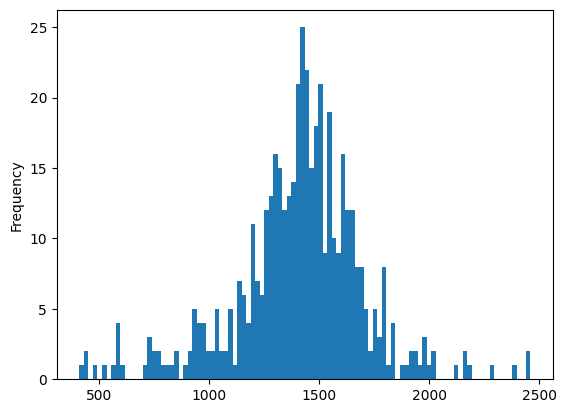

In [39]:
df[(df['cre_pos']>0) | (df['cre_neg'] >0)].groupby('tf_cluster')['locus_id'].count().plot.hist(bins=100, log=False)

<Axes: ylabel='Frequency'>

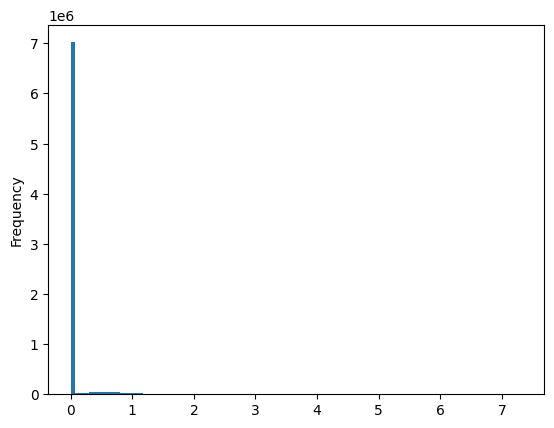

In [19]:
df['cre_pos'].plot.hist(bins=100, log=False)

<Axes: ylabel='Frequency'>

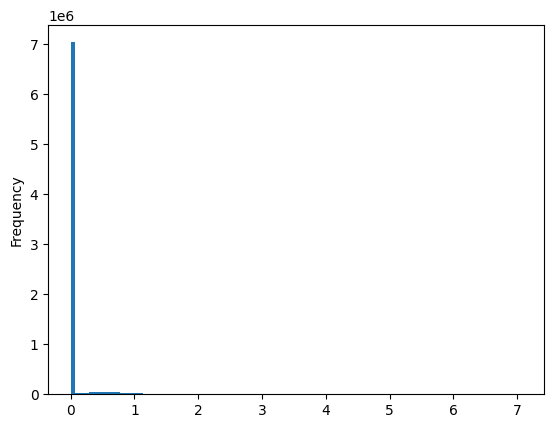

In [20]:
df['cre_neg'].plot.hist(bins=100, log=False)

In [12]:
df['cell_type_leiden'].nunique()

12

In [13]:
df['tf_state'].nunique()

469

In [14]:
df['locus_id'].nunique()

22

In [8]:
df[df['cre_sequence'].str.contains("N")]

,locus_id,cre_sequence,cre_chrom,cre_start,cre_end,summit_center,cell_leiden,tf_state,cre_expression
857332,chr10_58267793_58268294_-,CTGCCCAACTCTCGGCGGAACGCGGCTCCCGGCTCCTGTTCCTCTG...,chr10,58267793,58268294,58268054,0,[12.290051 -0.29787436 -0.5516869 0.903908...,0.927106
857333,chr10_58267793_58268294_-,CTGCCCAACTCTCGGCGGAACGCGGCTCCCGGCTCCTGTTCCTCTG...,chr10,58267793,58268294,58268054,1,[ 1.62722263e+01 -6.06215656e-01 -1.01074785e-...,0.000000
857334,chr10_58267793_58268294_-,CTGCCCAACTCTCGGCGGAACGCGGCTCCCGGCTCCTGTTCCTCTG...,chr10,58267793,58268294,58268054,10,[-3.3684096 7.3105493 -0.5453875 1.715907...,0.000000
857335,chr10_58267793_58268294_-,CTGCCCAACTCTCGGCGGAACGCGGCTCCCGGCTCCTGTTCCTCTG...,chr10,58267793,58268294,58268054,100,[ 1.0856134e+01 2.7644700e-01 2.2283373e+00 ...,0.000000
857336,chr10_58267793_58268294_-,CTGCCCAACTCTCGGCGGAACGCGGCTCCCGGCTCCTGTTCCTCTG...,chr10,58267793,58268294,58268054,101,[10.28082 -0.5057329 -1.1006231 -0.020064...,0.000000
...,...,...,...,...,...,...,...,...,...
7393780,chrM_3063_3604_-,ATCTGAGTTCAGACCGGAGTAATCCAGGTCGGTTTCTATCTACNTT...,chrM,3063,3604,3254,95,[11.820778 -1.4264985 0.93041694 -1.560866...,0.000000
7393781,chrM_3063_3604_-,ATCTGAGTTCAGACCGGAGTAATCCAGGTCGGTTTCTATCTACNTT...,chrM,3063,3604,3254,96,[-3.2084305 1.5347707 -0.32373002 -0.791447...,0.000000
7393782,chrM_3063_3604_-,ATCTGAGTTCAGACCGGAGTAATCCAGGTCGGTTTCTATCTACNTT...,chrM,3063,3604,3254,97,[ 9.050616 -0.5783193 -1.8569765 0.332020...,0.000000
7393783,chrM_3063_3604_-,ATCTGAGTTCAGACCGGAGTAATCCAGGTCGGTTTCTATCTACNTT...,chrM,3063,3604,3254,98,[-1.71419 -0.64675546 4.619326 -4.230164...,0.000000


In [12]:
pd.options.display.float_format = '{:,.0f}'.format

In [13]:
df['cre_sequence'].str.len().describe()

count   7,643,762
mean          561
std           151
min           501
25%           501
50%           501
75%           501
max         3,654
Name: cre_sequence, dtype: float64